## 1、什么是异常检测

**异常检测（Outlier Detection）**，顾名思义，是识别与正常数据不同的数据，与预期行为差异大的数据。

识别如信用卡欺诈，工业生产异常，网络流里的异常（网络侵入）等问题，针对的是少数的事件。



### 1.1 异常的类别

**点异常**：指的是少数个体实例是异常的，大多数个体实例是正常的，例如正常人与病人的健康指标；

**上下文异常**：又称上下文异常，指的是在特定情境下个体实例是异常的，在其他情境下都是正常的，例如在特定时间下的温度突然上升或下降，在特定场景中的快速信用卡交易；

**群体异常**：指的是在群体集合中的个体实例出现异常的情况，而该个体实例自身可能不是异常，例如社交网络中虚假账号形成的集合作为群体异常子集，但子集中的个体节点可能与真实账号一样正常。



### 1.2 异常检测任务分类

**有监督**：训练集的正例和反例均有标签

**无监督**：训练集无标签

**半监督**：在训练集中只有单一类别（正常实例）的实例，没有异常实例参与训练



### 1.3 异常检测场景

* **故障检测**

* **物联网异常检测**

* **欺诈检测**

* **工业异常检测**

* **时间序列异常检测**

* **视频异常检测**

* **日志异常检测**

* **医疗日常检测**

* **网络入侵检测**



## 2、异常检测常用方法

### 2.1 传统方法

#### 2.1.1 基于统计学的方法

统计学方法对数据的正常性做出假定。**它们假定正常的数据对象由一个统计模型产生，而不遵守该模型的数据是异常点。**统计学方法的有效性高度依赖于对给定数据所做的统计模型假定是否成立。

异常检测的统计学方法的一般思想是：学习一个拟合给定数据集的生成模型，然后识别该模型低概率区域中的对象，把它们作为异常点。

即利用统计学方法建立一个模型，然后考虑对象有多大可能符合该模型。

假定输入数据集为$\{x^{(1)}, x^{(2)}, ..., x^{(m)}\}$，数据集中的样本服从正态分布，即$x^{(i)}\sim N(\mu, \sigma^2)$，我们可以根据样本求出参数$\mu$和$\sigma$。

$\mu=\frac 1m\sum_{i=1}^m x^{(i)}$

$\sigma^2=\frac 1m\sum_{i=1}^m (x^{(i)}-\mu)^2$

#### 2.1.2 线性模型

典型的如PCA方法，Principle Component Analysis是主成分分析，简称PCA。它的应用场景是对数据集进行降维。降维后的数据能够最大程度地保留原始数据的特征（以数据协方差为衡量标准）。
PCA的原理是通过构造一个新的特征空间，把原数据映射到这个新的低维空间里。PCA可以提高数据的计算性能，并且缓解"高维灾难"。

#### 2.1.3 基于相似度的方法

&emsp;&emsp;这类算法适用于数据点的聚集程度高、离群点较少的情况。同时，因为相似度算法通常需要对每一个数据分别进行相应计算，所以这类算法通常计算量大，不太适用于数据量大、维度高的数据。    
&emsp;&emsp;基于相似度的检测方法大致可以分为三类： 

+ 基于集群（簇）的检测，如DBSCAN等聚类算法。    
  &emsp;&emsp;聚类算法是将数据点划分为一个个相对密集的“簇”，而那些不能被归为某个簇的点，则被视作离群点。这类算法对簇个数的选择高度敏感，数量选择不当可能造成较多正常值被划为离群点或成小簇的离群点被归为正常。因此对于每一个数据集需要设置特定的参数，才可以保证聚类的效果，在数据集之间的通用性较差。聚类的主要目的通常是为了寻找成簇的数据，而将异常值和噪声一同作为无价值的数据而忽略或丢弃，在专门的异常点检测中使用较少。    
  &emsp;&emsp;聚类算法的优缺点：    
  （1）能够较好发现小簇的异常；    
  （2）通常用于簇的发现，而对异常值采取丢弃处理，对异常值的处理不够友好；    
  （3）产生的离群点集和它们的得分可能非常依赖所用的簇的个数和数据中离群点的存在性；    
  （4）聚类算法产生的簇的质量对该算法产生的离群点的质量影响非常大。
+ 基于距离的度量，如k近邻算法。    
  &emsp;&emsp;k近邻算法的基本思路是对每一个点，计算其与最近k个相邻点的距离，通过距离的大小来判断它是否为离群点。在这里，离群距离大小对k的取值高度敏感。如果k太小（例如1），则少量的邻近离群点可能导致较低的离群点得分；如果k太大，则点数少于k的簇中所有的对象可能都成了离群点。为了使模型更加稳定，距离值的计算通常使用k个最近邻的平均距离。    
  &emsp;&emsp;k近邻算法的优缺点：    
  （1）简单；    
  （2）基于邻近度的方法需要O(m2)时间，大数据集不适用；    
  （3）对参数的选择敏感；   
  （4）不能处理具有不同密度区域的数据集，因为它使用全局阈值，不能考虑这种密度的变化。    
+ 基于密度的度量，如LOF（局部离群因子）算法。  
  &emsp;&emsp;局部离群因子（LOF）算法与k近邻类似，不同的是它以相对于其邻居的局部密度偏差而不是距离来进行度量。它将相邻点之间的距离进一步转化为“邻域”，从而得到邻域中点的数量（即密度），认为密度远低于其邻居的样本为异常值。    
  LOF（局部离群因子）算法的优缺点：    
  （1）给出了对离群度的定量度量；    
  （2）能够很好地处理不同密度区域的数据；   
  （3）对参数的选择敏感。     



### 2.2 集成方法

集成是提高数据挖掘算法精度的常用方法。集成方法将多个算法或多个基检测器的输出结合起来。其基本思想是一些算法在某些子集上表现很好，一些算法在其他子集上表现很好，然后集成起来使得输出更加鲁棒。集成方法与基于子空间方法有着天然的相似性，子空间与不同的点集相关，而集成方法使用基检测器来探索不同维度的子集，将这些基学习器集合起来。

常用的集成方法有Feature bagging，孤立森林等。

**feature bagging **：

与bagging法类似，只是对象是feature。



**孤立森林**：

孤立森林假设我们用一个随机超平面来切割数据空间，切一次可以生成两个子空间。然后我们继续用随机超平面来切割每个子空间并循环，直到每个子空间只有一个数据点为止。直观上来讲，那些具有高密度的簇需要被切很多次才会将其分离，而那些低密度的点很快就被单独分配到一个子空间了。孤立森林认为这些很快被孤立的点就是异常点。

用四个样本做简单直观的理解，d是最早被孤立出来的，所以d最有可能是异常。


### 2.3 机器学习

在有标签的情况下，可以使用树模型（gbdt,xgboost等）进行分类，缺点是异常检测场景下数据标签是不均衡的，但是利用机器学习算法的好处是可以构造不同特征。	

## 3、异常检测常用开源库

**Scikit-learn：**

**Scikit-learn**是一个Python语言的开源机器学习库。它具有各种分类，回归和聚类算法。也包含了一些异常检测算法，例如LOF和孤立森林。

官网：https://scikit-learn.org/stable/



**PyOD：**

> **[Python Outlier Detection（PyOD）](https://link.zhihu.com/?target=https%3A//github.com/yzhao062/pyod)**是当下最流行的Python异常检测工具库，其主要亮点包括：
>
> - 包括近20种常见的异常检测算法，比如经典的LOF/LOCI/ABOD以及最新的**深度学习**如对抗生成模型（GAN）和**集成异常检测**（outlier ensemble）
> - **支持不同版本的Python**：包括2.7和3.5+；**支持多种操作系统**：windows，macOS和Linux
> - **简单易用且一致的API**，**只需要几行代码就可以完成异常检测**，方便评估大量算法
> - 使用JIT和并行化（parallelization）进行优化，加速算法运行及扩展性（scalability），可以处理大量数据
>
> ​                                                                                       ——https://zhuanlan.zhihu.com/p/58313521

## 4.pyod库基本操作

### 4.1 Pyod库介绍
Python Outlier Detection（PyOD）是当下最流行的Python异常检测工具库，其主要亮点包括：
* 包括近20种常见的异常检测算法，比如经典的LOF/LOCI/ABOD以及最新的深度学习如对抗生成模型（GAN）和集成异常检测（outlier ensemble）
* 支持不同版本的Python：包括2.7和3.5+；支持多种操作系统：windows，macOS和Linux
* 简单易用且一致的API，只需要几行代码就可以完成异常检测，方便评估大量算法
* 使用JIT和并行化（parallelization）进行优化，加速算法运行及扩展性（scalability），可以处理大量数据

从2018年5月正式发布以来，PyOD已经获得了超过300,000次下载与2,500个GitHub Star，在所有GitHub数据挖掘（data mining）工具库排名8 。PyOD论文也已经在 Journal of Machine Learning Research (JMLR)上发表。同时它也被运用于多项学术研究中

### 4.2 API介绍与实例（API References & Examples）
异常检测算法基本都是无监督学习，所以只需要X（输入数据），而不需要y（标签）。PyOD的使用方法和Sklearn中聚类分析很像，它的检测器（detector）均有统一的API。所有的PyOD检测器clf均有统一的API以便使用，**[完整的API使用参考可以查阅（API CheatSheet - pyod 0.6.8 documentation）](https://pyod.readthedocs.io/en/latest/api_cc.html)** 

* fit(X): 用数据X来“训练/拟合”检测器clf。即在初始化检测器clf后，用X来“训练”它。
* fit_predict_score(X, y): 用数据X来训练检测器clf，并预测X的预测值，并在真实标签y上进行评估。此处的y只是用于评估，而非训练
* decision_function(X): 在检测器clf被fit后，可以通过该函数来预测未知数据的异常程度，返回值为原始分数，并非0和1。返回分数越高，则该数据点的异常程度越高
* predict(X): 在检测器clf被fit后，可以通过该函数来预测未知数据的异常标签，返回值为二分类标签（0为正常点，1为异常点）
* predict_proba(X): 在检测器clf被fit后，预测未知数据的异常概率，返回该点是异常点概率
当检测器clf被初始化且fit(X)函数被执行后，clf就会生成两个重要的属性：

* decision_scores: 数据X上的异常打分，分数越高，则该数据点的异常程度越高
* labels_: 数据X上的异常标签，返回值为二分类标签（0为正常点，1为异常点）


### 4.3 安装PyOD

注意:PyOD还包含一些基于神经网络的模型，这些模型在Keras中实现。 PyOD不会自动安装Keras或TensorFlow。 如果要使用基于神经网络的模型，则需要手动安装Keras和其他库。

### 4.4 代码示例

#### 4.4.1 pyod基本使用

In [3]:
import pyod as py
# 获取数据集
contamination = 0.1  # 离群点百分比
n_train = 200  # 训练集样本量
n_test = 100  # 测试集样本量

X_train, y_train, X_test, y_test=py.utils.data.generate_data(n_train=n_train,n_test=n_test,
                                                             contamination=contamination)

/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [6]:
from pyod.models.knn import KNN   # imprt kNN分类器

# 训练一个kNN检测器
clf_name = 'kNN'
clf = KNN() # 初始化检测器clf
clf.fit(X_train) # 使用X_train训练检测器clf

# 返回训练数据X_train上的异常标签和异常分值
y_train_pred = clf.labels_  # 返回训练数据上的分类标签 (0: 正常值, 1: 异常值)
y_train_scores = clf.decision_scores_  # 返回训练数据上的异常值 (分值越大越异常)

# 用训练好的clf来预测未知数据中的异常值
y_test_pred = clf.predict(X_test)  # 返回未知数据上的分类标签 (0: 正常值, 1: 异常值)
y_test_scores = clf.decision_function(X_test)  #  返回未知数据上的异常值 (分值越大越异常)


On Test Data:
kNN ROC:1.0, precision @ rank n:1.0


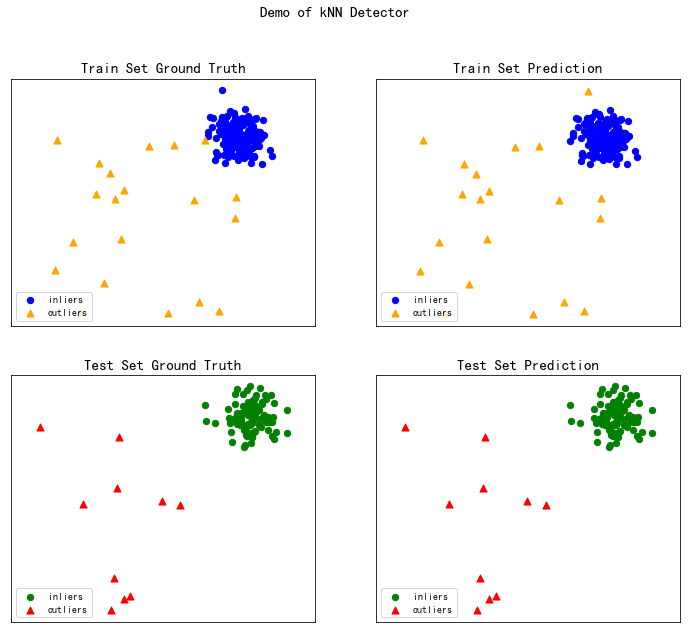

In [9]:
from pyod.utils.example import visualize
from pyod.utils.data import evaluate_print

# 评估预测结果
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# 可视化
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
    y_test_pred, show_figure=True, save_figure=False)

#### 4.4.2 用Pyod工具检测人工数据生成数据

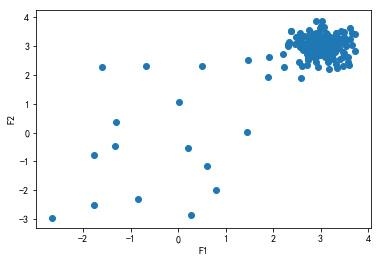

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
# 导入想要用来检测数据集中异常值的模型。使用ABOD和KNN：
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
# 创建一个带有异常值的随机数据集并绘制它
from pyod.utils.data import generate_data, get_outliers_inliers
# 生成数据
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)
# 在默认情况下，离群值在生成数据函数中是0.1
outlier_fraction = 0.1
# 将异常值和异常值存储在不同的numpy数组中
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)
n_inliers = len(x_inliers)
n_outliers = len(x_outliers)
#分离这两个特性并使用它来绘制数据
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)
# create a meshgrid
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
# scatter plot
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

No of Errors :  Angle-based Outlier Detector (ABOD) 4
No of Errors :  K Nearest Neighbors (KNN) 2


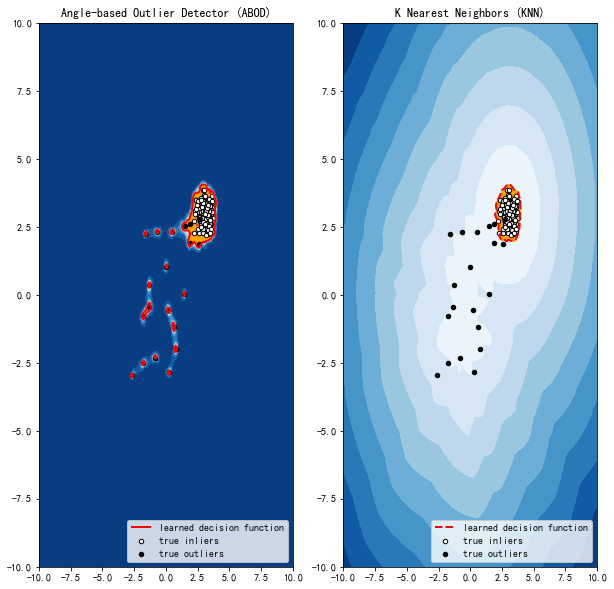

In [22]:
#创建一个dictionary并添加要用于检测异常值的所有模型：
classifiers = {
'Angle-based Outlier Detector (ABOD)' : ABOD(contamination=outlier_fraction),
'K Nearest Neighbors (KNN)' : KNN(contamination=outlier_fraction)
}
#将数据拟合到我们在dictionary中添加的每个模型，然后，查看每个模型如何检测异常值：
#set the figure size
plt.figure(figsize=(10, 10))
for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)
    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)
    # rest of the code is to create the visualization
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
    subplot = plt.subplot(1, 2, i + 1)
    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)
    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k')
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')
    subplot.legend(
    [a.collections[0], b, c],
    ['learned decision function', 'true inliers', 'true outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='lower right')
    subplot.set_title(clf_name)
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))

plt.show()

#### 4.4.3 异常点检测(Scikit-Learn)
* One-Class SVM（一分类向量机，非高斯分布）
* EllipticEnvelope（基于高斯概率密度的异常点检测）
* Isolation Forest（基于集成学习方法异常点检测）
* LocalOutlierFactor（基于密度的局部异常因子），并基于同一数据集，对比不同检测方法的效果。

/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


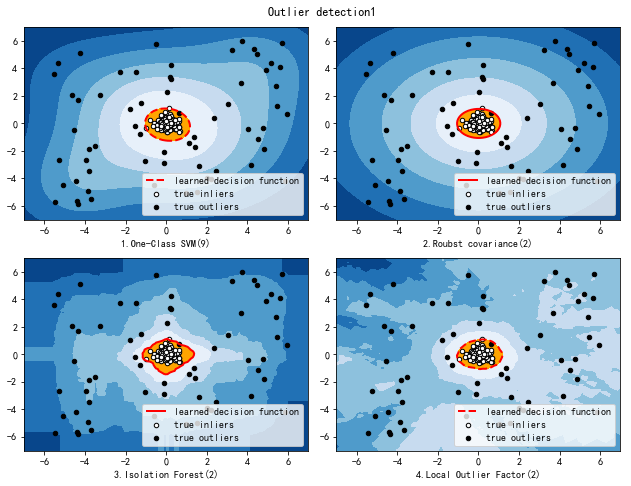

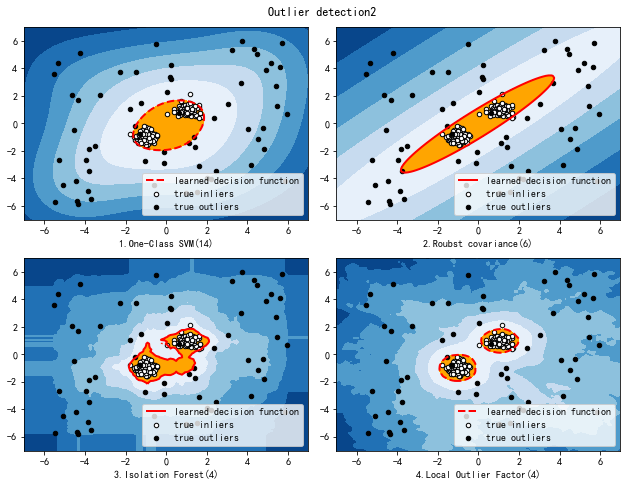

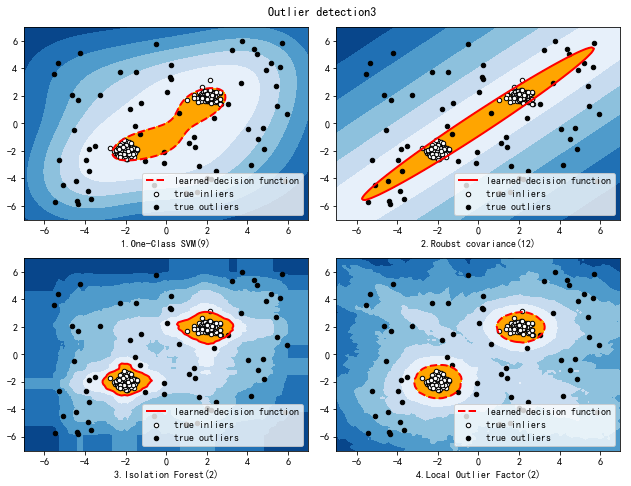

In [24]:
'''
目标：比较One-Class SVM、EllipticEnvelope、Isolation Forest、
LocalOutlierFactor这4种异常检测算法在相同数据集下的异常检测效果。
'''
 
import numpy as np
from scipy  import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
 
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
 
 
rng = np.random.RandomState(42)
 
#设置样本数量、异常样本比例，不同类样本分离度
n_samples = 256
outliers_fraction = 0.25
clusters_separation = [0,1,2]
 
#定义各种异常检测方法
classifiers = {
    "One-Class SVM":svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,kernel='rbf',gamma=0.1),
    "Roubst covariance":EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest":IsolationForest(max_samples=n_samples,
                                       contamination=outliers_fraction,
                                      random_state=rng),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=35,
                                             contamination=outliers_fraction)}
#样本集各变量赋初值
xx,yy = np.meshgrid(np.linspace(-7,7,100),np.linspace(-7,7,100))
n_inliers = int((1 - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples,dtype=int)
ground_truth[-n_outliers:] = -1
 
#在不同的样本分离度下测试异常检测效果
for i,offset in enumerate(clusters_separation):
    np.random.seed(42)
    #生成数据
    X1 = 0.3 * np.random.randn(n_inliers // 2,2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2,2) + offset
    X = np.r_[X1,X2]
    X = np.r_[X,np.random.uniform(low=-6,high=6,size=(n_outliers,2))]
    
    #模型匹配
    plt.figure(figsize=(9,7))
    for j,(clf_name,clf) in enumerate(classifiers.items()):
        #数据匹配
        if clf_name == "Local Outlier Factor":
            y_pred = clf.fit_predict(X)
            scores_pred = clf.negative_outlier_factor_
        else:
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
 
        #画图
        if clf_name == "Local Outlier Factor":
            Z = clf._decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2,2,j+1)
        subplot.contourf(xx,yy,Z,levels=np.linspace(Z.min(),threshold,7),
                        cmap=plt.cm.Blues_r)
        a = subplot.contour(xx,yy,Z,levels=[threshold],linewidths=2,colors='red')
        subplot.contourf(xx,yy,Z,levels=[threshold,Z.max()],colors='orange')
        #正常样本
        b = subplot.scatter(X[:-n_outliers,0],X[:-n_outliers,1],c='white',s=20,edgecolor='k')
        #异常样本
        c = subplot.scatter(X[-n_outliers:,0],X[-n_outliers:,1],c='black',s=20,edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0],b,c],
            ['learned decision function','true inliers','true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("{}.{}({})".format(j+1,clf_name,n_errors))
        subplot.set_xlim((-7,7))
        subplot.set_ylim((-7,7))
    plt.subplots_adjust(0.04,0.1,0.96,0.94,0.1,0.20)
    plt.suptitle("Outlier detection{}".format(i+1))
    
plt.show()

### 4.5 相关教程

**[Analytics Vidhya: An Awesome Tutorial to Learn Outlier Detection in Python using PyOD Library
](https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/)** 

**[KDnuggets: Intuitive Visualization of Outlier Detection Methods
](https://www.kdnuggets.com/2019/02/outlier-detection-methods-cheat-sheet.html)** 

**[Anomaly Detection Learning Resources](https://github.com/yzhao062/anomaly-detection-resources)** 